![Python Programming for Scientists in a hurry](fig/Title_Python.png)

<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 60%; padding: 5px">
  <h1 id="subtitle">Chapter 5. Matplotlib</h1>
  <h2 id="subtitle">Guillermo Avendaño Franco<br>Aldo Humberto Romero</h2>
  <br>
  <img src="fig/1-line logotype124-295.png" alt="Scientific Computing with Python" style="width:50%" align="left">
  </div>
  <div style="border: none; float: left; width: 30%; padding: 5px">
  <img src="fig/SCPython.png" alt="Scientific Computing with Python" style="width:100%">
  </div>
</div>

## List of Notebooks

Python is a great general-purpose programming language on its own. 
Python is a general purpose programming language. It is interpreted and dynamically typed and is very suited for interactive work and quick prototyping while being powerful enough to write large applications in.
The lesson is particularly oriented to Scientific Computing. 
Other episodes in the series include:

  * Language Syntax
  * Standard Library
  * Scientific Packages
  * NumPy
  * **Matplotlib \[This notebook\]**
  * SciPy 
  * Pandas
  * Cython
  * Parallel Computing

After completing all the series in this lesson you will realize that python has become a powerful environment for scientific computing at several levels, from interactive computing to scripting to big project developments.

## Setup

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2024-07-26T13:27:14.716096-04:00

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.14.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [3]:
import time
start = time.time()
chapter_number = 5
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%watermark -iv

numpy     : 1.26.2
matplotlib: 3.8.2



# Matplotlib (Python data plot package)

Matplotlib is a plotting library. This section gives a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB. Many of the examples here have been taken from https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html, 

By running this special iPython command, we will be displaying plots inline:

In [6]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is the plot, which allows you to plot 2D data. Here is a simple example:

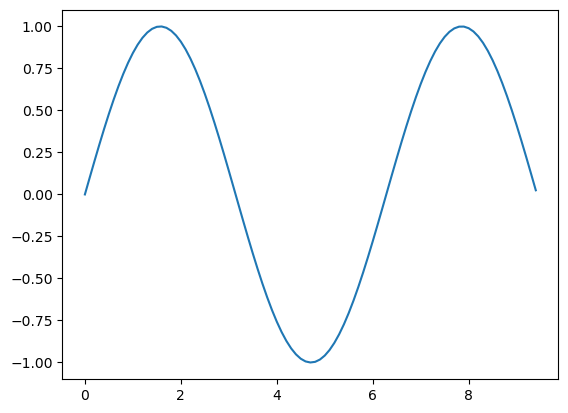

In [7]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

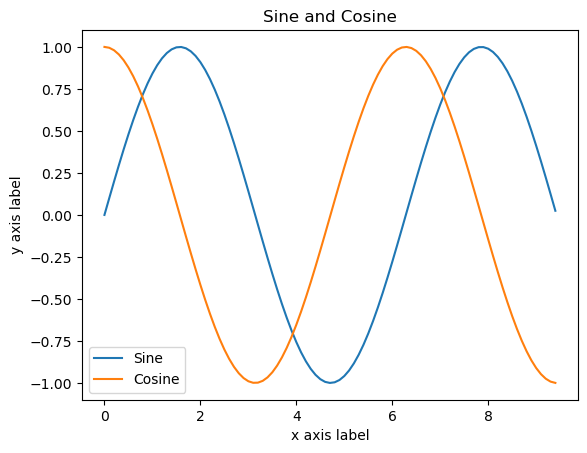

In [8]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

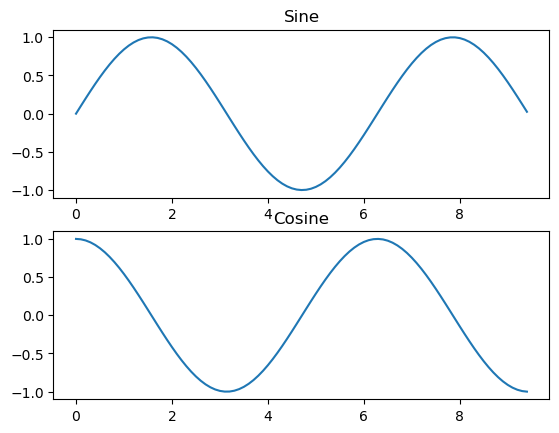

In [9]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

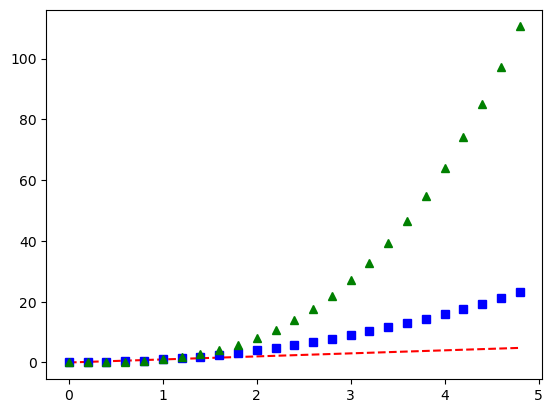

In [10]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares, and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

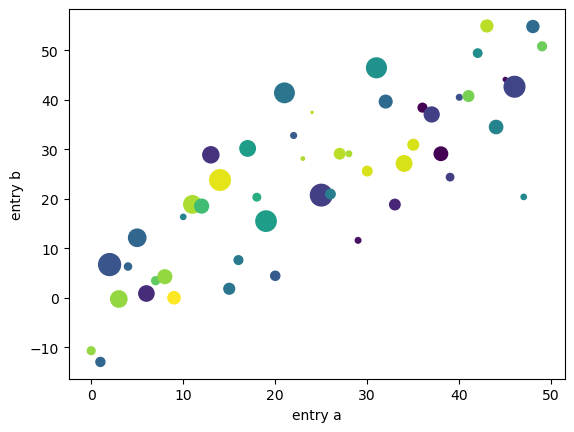

In [11]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

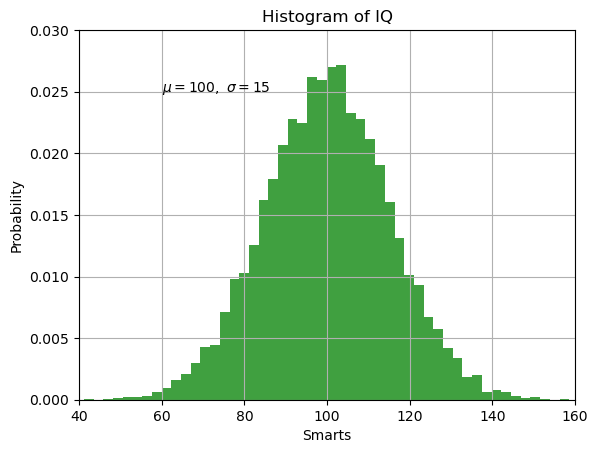

In [12]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

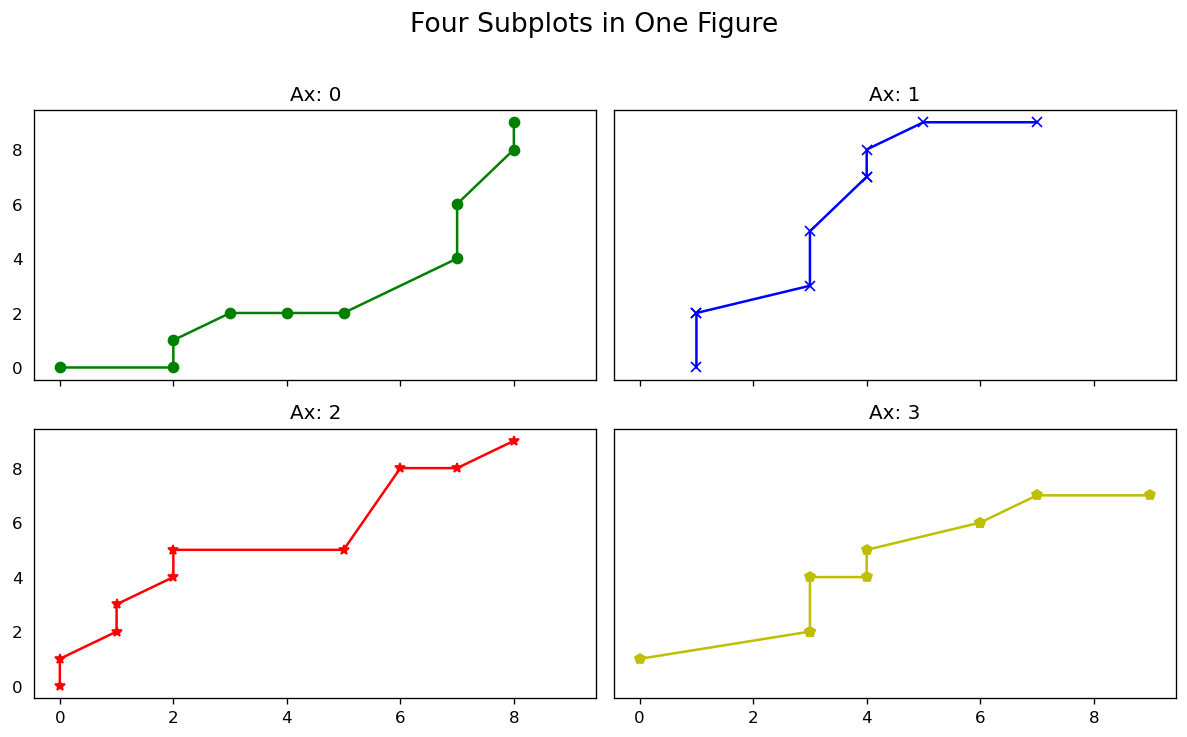

In [13]:
# Draw multiple plots using for-loops using object-oriented syntax
from numpy.random import seed, randint
seed(100)

# Create Figure and Subplots
fig, axes = plt.subplots(2,2, figsize=(10,6), sharex=True, sharey=True, dpi=120)

# Define the colors and markers to use
colors = {0:'g', 1:'b', 2:'r', 3:'y'}
markers = {0:'o', 1:'x', 2:'*', 3:'p'}

# Plot each axes
for i, ax in enumerate(axes.ravel()):
    ax.plot(sorted(randint(0,10,10)), sorted(randint(0,10,10)), marker=markers[i], color=colors[i])  
    ax.set_title('Ax: ' + str(i))
    ax.yaxis.set_ticks_position('none')

plt.suptitle('Four Subplots in One Figure', verticalalignment='bottom', fontsize=16)    
plt.tight_layout()
plt.show()

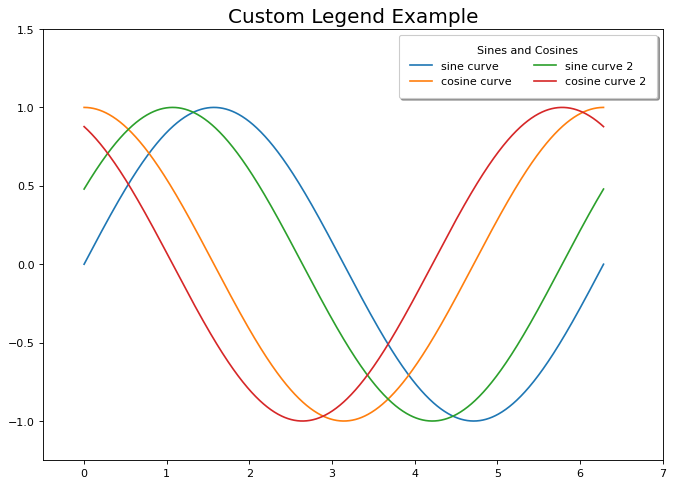

In [14]:
plt.figure(figsize=(10,7), dpi=80)
X = np.linspace(0, 2*np.pi, 1000)
sine = plt.plot(X,np.sin(X)); cosine = plt.plot(X,np.cos(X))
sine_2 = plt.plot(X,np.sin(X+.5)); cosine_2 = plt.plot(X,np.cos(X+.5))
plt.gca().set(ylim=(-1.25, 1.5), xlim=(-.5, 7))
plt.title('Custom Legend Example', fontsize=18)

# Modify legend
plt.legend([sine[0], cosine[0], sine_2[0], cosine_2[0]],   # plot items
           ['sine curve', 'cosine curve', 'sine curve 2', 'cosine curve 2'],  
           frameon=True,                                   # legend border
           framealpha=1,                                   # transparency of border
           ncol=2,                                         # num columns
           shadow=True,                                    # shadow on
           borderpad=1,                                    # thickness of border
           title='Sines and Cosines')                      # title
plt.show()

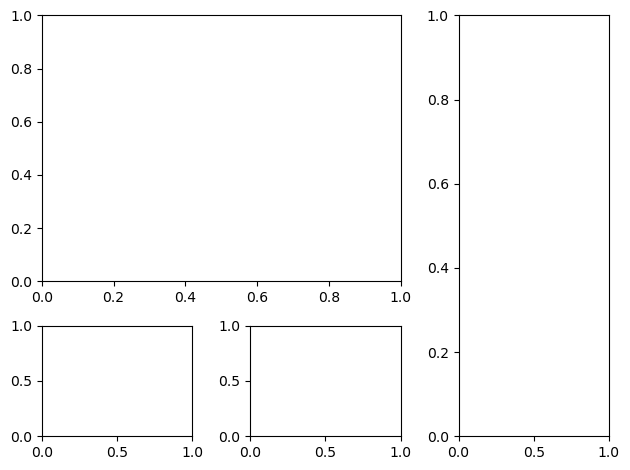

In [15]:
# Supplot2grid approach
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=2) # topleft
ax3 = plt.subplot2grid((3,3), (0,2), rowspan=3)            # right
ax4 = plt.subplot2grid((3,3), (2,0))                       # bottom left
ax5 = plt.subplot2grid((3,3), (2,1))                       # bottom right
fig.tight_layout()

In [16]:
# Plot inside a plot
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(-0.50, 1., 1000)

# Outer Plot
ax.plot(x, x**2)
ax.plot(x, np.sin(x))
ax.set(xlim=(-0.5, 1.0), ylim=(-0.5,1.2))
fig.tight_layout()

# Inner Plot
inner_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # x, y, width, height
inner_ax.plot(x, x**2)
inner_ax.plot(x, np.sin(x))
inner_ax.set(title='Zoom In', xlim=(-.2, .2), ylim=(-.01, .02), 
             yticks = [-0.01, 0, 0.01, 0.02], xticks=[-0.1,0,.1])
ax.set_title("Plot inside a Plot", fontsize=20)
plt.show()
plt.rcParams.update(plt.rcParamsDefault)  # reset to defaults

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
# Scatterplot with varying size and color of points
# Data from https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv
import pandas as pd
midwest = pd.read_csv("./data/midwest_filter.csv")

# Plot
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('area', 'poptotal', data=midwest, s='dot_size', c='popdensity', 
            cmap='Reds', edgecolors='black', linewidths=.5)
plt.title("Bubble Plot of PopTotal vs Area\n(color: 'popdensity' & size: 'dot_size' - both are numeric columns in midwest)", fontsize=16)
plt.xlabel('Area', fontsize=18)
plt.ylabel('Poptotal', fontsize=18)
plt.colorbar()
plt.show()     

## Seaborn (Statistical Plots)

There are more packages beyond Matplotlib. Seaborn for example is a package built on top of Matplotlib specialized in Statistical plotting. Very useful in areas such as Data Mining and Machine Learning.

In [ ]:
import seaborn as sns
sns.set_style("white")

# Import Data
# Data from https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

# Acknowledgments and References

This Notebook has been adapted by **Guillermo Avendaño** (WVU), **Jose Rogan** (Universidad de Chile) and **Aldo Humberto Romero** (WVU) from the [Tutorials for Stanford cs228 and cs231n](https://github.com/kuleshov/cs228-material). A large part of the info was also built from scratch. In turn, that material was adapted by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/). Another good resource, in particular, if you want to just look for an answer to specific questions is [planetpython.org](http:planetpython.org), in particular for data science.

Changes to the original tutorial include strict Python 3 formats and a split of the material to fit a series of lessons on Python Programming for WVU's faculty and graduate students.

The support of the National Science Foundation and the US Department of Energy under projects: DMREF-NSF 1434897, NSF OAC-1740111 and DOE DE-SC0016176 is recognized.

<div style="clear: both; display: table;">
<div style="border: none; float: left; width: 40%; padding: 10px">
<img src="fig/NSF.jpg" alt="National Science Foundation" style="width:50%" align="left">
    </div>
    <div style="border: none; float: right; width: 40%; padding: 10px">
<img src="fig/DOE.jpg" alt="National Science Foundation" style="width:50%" align="right">
</div>

# Back of the Book

In [ ]:
%matplotlib inline

In [ ]:
plt.figure(figsize=(3,3))
n = chapter_number
maxt=(2*(n-1)+3)*np.pi/2
t = np.linspace(np.pi/2, maxt, 1000)
tt= 1.0/(t+0.01)
x = (maxt-t)*np.cos(t)**3
y = t*np.sqrt(np.abs(np.cos(t))) + np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [ ]:
end = time.time()
print(f'Chapter {chapter_number} run in {int(end - start):d} seconds')